# 데이터 불러오기 및 분석 (EDA)

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from wordcloud import WordCloud

%matplotlib inline

In [0]:
DATA_IN_PATH = r'/data_in/'

print("파일의 크기 : ")
for file in os.listdir(DATA_IN_PATH):
    print(file.ljust(30) + str(round(os.path.getsize(DATA_IN_PATH+file)/1000000, 2)) + 'MB')

파일의 크기 : 
ratings.txt                   19.52MB
ratings_test.txt              4.89MB
ratings_train.txt             14.63MB


In [0]:
train_data = pd.read_csv(DATA_IN_PATH + 'ratings_train.txt', delimiter='\t')

train_data.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [0]:
print("전체 학습 데이터의 개수 : {}".format(len(train_data)))

전체 학습 데이터의 개수 : 150000


In [0]:
train_length = train_data['document'].astype(str).apply(len)

train_length.head()

0    19
1    33
2    17
3    29
4    61
Name: document, dtype: int64

Text(0, 0.5, 'Number of review')

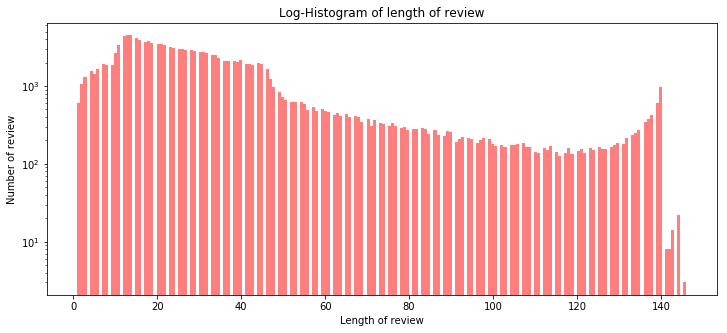

In [0]:
plt.figure(figsize=(12, 5))

plt.hist(train_length, bins=200, alpha=0.5, color='r', label='word')
plt.yscale('log', nonposy='clip')

plt.title('Log-Histogram of length of review')
plt.xlabel('Length of review')
plt.ylabel('Number of review')

In [0]:
train_length.describe()

count    150000.000000
mean         35.203453
std          29.531983
min           1.000000
25%          16.000000
50%          27.000000
75%          42.000000
max         146.000000
Name: document, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0xc3ba860>,
 'caps': [<matplotlib.lines.Line2D at 0xc3baef0>,
 'boxes': [<matplotlib.lines.Line2D at 0xc3ba3c8>],
 'medians': [<matplotlib.lines.Line2D at 0xc3b15c0>],
 'fliers': [<matplotlib.lines.Line2D at 0xc3b1c50>],
 'means': [<matplotlib.lines.Line2D at 0xc3b1908>]}

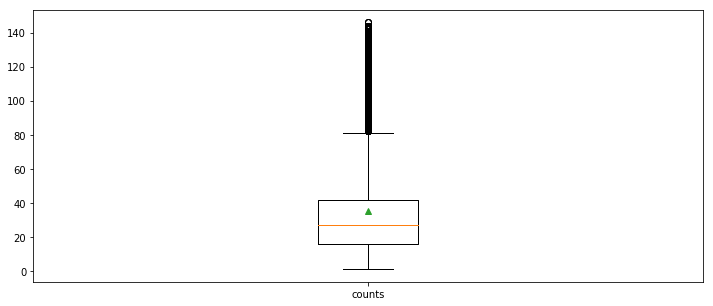

In [0]:
plt.figure(figsize=(12, 5))

plt.boxplot(train_length, labels=['counts'], showmeans=True)

In [0]:
# 데이터에 문자열이 아닌 데이터는 모두 제거 ... 어휘 빈도 분석은 문자열에 대해서만 진행할 수 있다.
train_review = [review for review in train_data['document'] if type(review) is str]

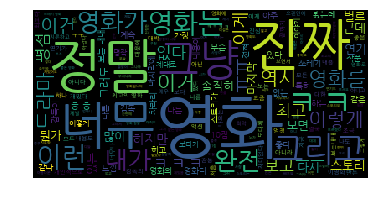

In [0]:
wordcloud = WordCloud(font_path=DATA_IN_PATH+'NanumGothic.ttf').generate(' '.join(train_review))

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

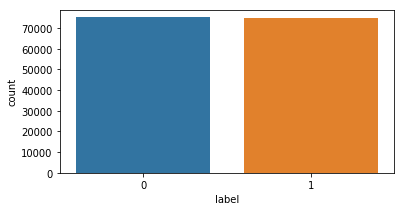

In [0]:
fig, ax = plt.subplots(1, 1, figsize=(6, 3))
sns.countplot(train_data['label'])

In [0]:
print("긍정 리뷰 개수 : {}".format(train_data['label'].value_counts()[1]))
print("부정 리뷰 개수 : {}".format(train_data['label'].value_counts()[0]))

긍정 리뷰 개수 : 74827
부정 리뷰 개수 : 75173


Text(0, 0.5, 'Number of reviews')

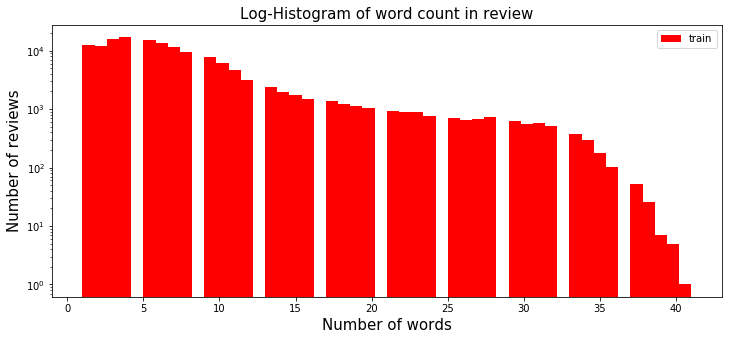

In [0]:
train_word_counts = train_data['document'].astype(str).apply(lambda x: len(x.split(' ')))

plt.figure(figsize=(12, 5))
plt.hist(train_word_counts, bins=50, color='r', label='train')
plt.title('Log-Histogram of word count in review', fontsize=15)
plt.yscale('log', nonposy='clip')
plt.legend()
plt.xlabel('Number of words', fontsize=15)
plt.ylabel('Number of reviews', fontsize=15)

In [0]:
train_word_counts.describe()

count    150000.000000
mean          7.584940
std           6.514063
min           1.000000
25%           3.000000
50%           6.000000
75%           9.000000
max          41.000000
Name: document, dtype: float64

In [0]:
qmarks = np.mean(train_data['document'].astype(str).apply(lambda x: '?' in x))
fullstop = np.mean(train_data['document'].astype(str).apply(lambda x: '.' in x))

print("물음표가 있는 질문 : {:.2f}%".format(qmarks * 100))
print("마침표가 있는 질문 : {:.2f}%".format(fullstop * 100))

물음표가 있는 질문 : 8.25%
마침표가 있는 질문 : 51.76%
